In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_Lab_SEE/Prg4/titanic1.csv')

In [ ]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


The dataset is about the survival history of people on titanic.
Survived is our target attribute.
We do not know now which attributes influence the result. after training we can play with attributes(include or exclude) and calculate the accuracy to see who influence the targets.

As we are considering male attribute also, we need to label encode that is convert string into integer

In [ ]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
df.iloc[:,3]=labelEncoder.fit_transform(df.iloc[:,3].values)
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


In [ ]:
y=df['Survived']
x=df[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']].values

New data point and its result

In [ ]:
test=[3,1,22,1,0]
res=0

In [ ]:
p=0
n=0
for val in y:
  if val==1:
    p+=1
  else:
    n+=1
print((p/n)*100)


62.75229357798165


Since the positive to negative ratio is near to 0.5 we can conclude the dataset to be partly balanced

Split into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

Build naive bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(x_test)

Print the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
cm

array([[110,  25],
       [ 25,  62]])

In [ ]:
tn,fp,fn,tp=confusion_matrix(list(y_test),list(y_pred),labels=[0,1]).ravel()
print('True Positive : ',tp)
print('True Negative : ',tn)
print('False Positive : ',fp)
print('False Negative : ',fn)

True Positive :  62
True Negative :  110
False Positive :  25
False Negative :  25


Calculate the metrics

In [ ]:

recall=(tp)/(tp+fn)
print("Recall: ",recall)

specificity=(tn)/(fp+tn)
print("Specificity: ",specificity)

precision=(tp)/(tp+fp)
print("Precision: ",precision)

npv=(tn)/(fn+tn)
print("NPV: ",npv)

f1_score=(2*precision*recall)/(precision+recall)
print("F1Score: ",f1_score)

mcc=(tp*tn-fp*fn)/(np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print("MCC: ",mcc)

Recall:  0.7126436781609196
Specificity:  0.8148148148148148
Precision:  0.7126436781609196
NPV:  0.8148148148148148
F1Score:  0.7126436781609196
MCC:  0.5274584929757343


Test the model for datapoint you curated above

In [ ]:
predicted=model.predict([test])
print("Predicted Value:", predicted)
print("Actual Value:",res)

Predicted Value: [0]
Actual Value: 0


Plot ROC AUC curve

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,y_pred)

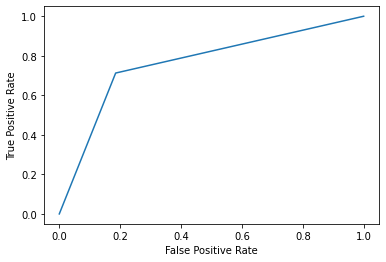

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
acc=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy: ",acc)

Accuracy:  0.7747747747747747


Final Inference : 
NBC are pretty easy to implement. They are great for using as a baseline you can compare other more complex models with. In this case, the accuracy is good. If we classify all women as survivors we might get a better accuracy.

We can also improve the accuracy by doing some feature engineering. A simple approach would be removing some features like (eg: removing all the features but the sex and the class).